In [1]:
import pandas as pd
pd.set_option('display.max_columns',100)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

# EDA of original dataset from Kaggle

Follow this article for steps for thorough EDA: https://towardsdatascience.com/11-simple-code-blocks-for-complete-exploratory-data-analysis-eda-67c2817f56cd

In [2]:
data = pd.read_csv('googleplaystore.csv')

In [3]:
data.shape

(10841, 13)

In [4]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [5]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [7]:
data.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1759,Temple Run 2,GAME,4.3,8118937,62M,"500,000,000+",Free,0,Everyone,Action,"July 5, 2018",1.49.1,4.0 and up
4915,"AC Air condition Troubleshoot,Repair,Maintenance",BOOKS_AND_REFERENCE,4.2,27,3.1M,"5,000+",Free,0,Everyone,Books & Reference,"February 7, 2018",1.1,4.0 and up
5462,Study AP World History,FAMILY,4.6,513,1.6M,"10,000+",Free,0,Everyone,Education,"July 18, 2016",1.1.2,4.0.3 and up
7749,Snowboard Racing Free Fun Game,GAME,3.8,4552,43M,"100,000+",Free,0,Everyone,Racing,"October 26, 2016",1.4.0,2.3.3 and up
2353,98point6,MEDICAL,4.6,47,21M,"10,000+",Free,0,Everyone,Medical,"August 2, 2018",1.7.1 (946),5.0 and up


In [8]:
data.describe(include='object')

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


In [9]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


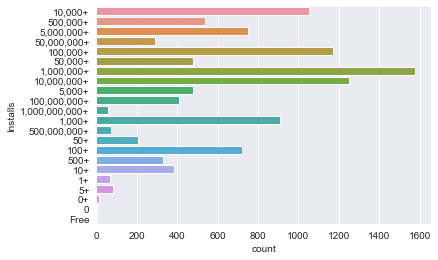

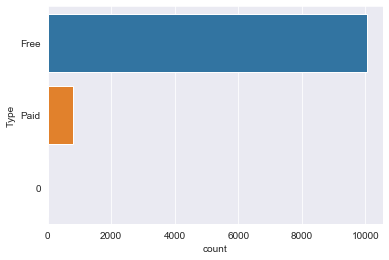

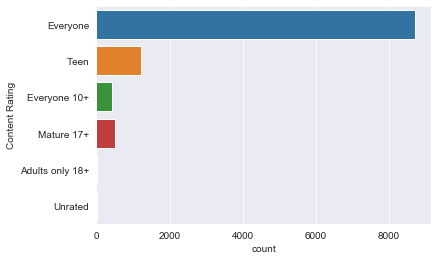

In [10]:
for column in data.select_dtypes(include='object'):
    if data[column].nunique() < 23:
        sns.countplot(y=column, data=data)
        plt.show()

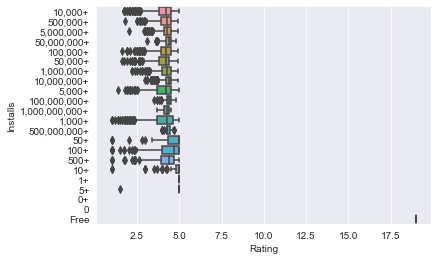

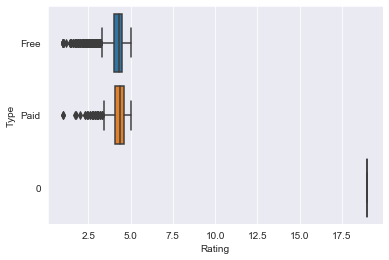

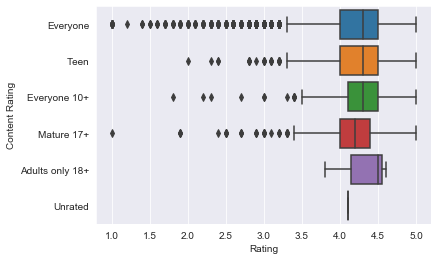

In [11]:
for column in data.select_dtypes(include='object'):
    if data[column].nunique() < 23:
        sns.boxplot(y=column, x='Rating', data=data)
        plt.show()

# Cleaning

- Convert the date column to datetype
- Remove row with mixed up values
- Drop unneeded columns
- convert category column to lowercase
- Convert 'size' column to numeric by first removing any non-digit characters
- Convert 'installs' to numeric
- Convert price to numeric by removing dollar sign
- Convert reviews to numeric

In [12]:
data.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [13]:
data['last_updated_cln'] = pd.to_datetime(data['Last Updated'], format = '%B %d, %Y', errors='coerce')

In [14]:
data[data['last_updated_cln'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,last_updated_cln
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN,NaT


Remove this row, error during data entry perhaps

In [15]:
data2 = data[~data['last_updated_cln'].isna()]

In [16]:
data2 = data2.drop(['Genres', 'Last Updated', 'Current Ver', 'Android Ver', 'App'], axis=1)

In [17]:
data.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,last_updated_cln
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2018-01-07


In [18]:
data2['Category'] = data2['Category'].str.lower()

In [19]:
data2['Size'] = data2['Size'].str.replace('[A-Za-z]+','')
data2['Size'] = pd.to_numeric(data2['Size'], errors='coerce')

C:\Users\Susan\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [20]:
data2['Installs'] = data2['Installs'].str.replace('[,\+]+','', regex=True)
data2['Installs'] = pd.to_numeric(data2['Installs'])

In [21]:
data2['Price'] = pd.to_numeric(data2['Price'].str.replace('$','', regex=True))

In [22]:
data2['Reviews'] = pd.to_numeric(data2['Reviews'])

In [23]:
data2.head(1)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,last_updated_cln
0,art_and_design,4.1,159,19.0,10000,Free,0.0,Everyone,2018-01-07


In [24]:
#PAuse

In [25]:
data2['year'] = data2['last_updated_cln'].dt.year

In [26]:
data2.head(1)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,last_updated_cln,year
0,art_and_design,4.1,159,19.0,10000,Free,0.0,Everyone,2018-01-07,2018


In [27]:
data2.columns = ['category', 'rating', 'reviews','size', 'installs', 'type', 'price',
       'content_for', 'last_updated', 'year']

In [28]:
data2.head(2)

,category,rating,reviews,size,installs,type,price,content_for,last_updated,year
0,art_and_design,4.1,159,19.0,10000,Free,0.0,Everyone,2018-01-07,2018
1,art_and_design,3.9,967,14.0,500000,Free,0.0,Everyone,2018-01-15,2018


In [29]:
data2.to_csv('googleplaystore_cln2.csv', index=False)

# EDA Clean Dataset

In [30]:
data = pd.read_csv('googleplaystore_cln2.csv')

In [31]:
data['last_updated'] = pd.to_datetime(data['last_updated'])
data.head()

,category,rating,reviews,size,installs,type,price,content_for,last_updated,year
0,art_and_design,4.1,159,19.0,10000,Free,0.0,Everyone,2018-01-07,2018
1,art_and_design,3.9,967,14.0,500000,Free,0.0,Everyone,2018-01-15,2018
2,art_and_design,4.7,87510,8.7,5000000,Free,0.0,Everyone,2018-08-01,2018
3,art_and_design,4.5,215644,25.0,50000000,Free,0.0,Teen,2018-06-08,2018
4,art_and_design,4.3,967,2.8,100000,Free,0.0,Everyone,2018-06-20,2018


In [32]:
data.shape

(10840, 10)

In [33]:
data.dtypes

category                object
rating                 float64
reviews                  int64
size                   float64
installs                 int64
type                    object
price                  float64
content_for             object
last_updated    datetime64[ns]
year                     int64
dtype: object

In [34]:
data.head()

,category,rating,reviews,size,installs,type,price,content_for,last_updated,year
0,art_and_design,4.1,159,19.0,10000,Free,0.0,Everyone,2018-01-07,2018
1,art_and_design,3.9,967,14.0,500000,Free,0.0,Everyone,2018-01-15,2018
2,art_and_design,4.7,87510,8.7,5000000,Free,0.0,Everyone,2018-08-01,2018
3,art_and_design,4.5,215644,25.0,50000000,Free,0.0,Teen,2018-06-08,2018
4,art_and_design,4.3,967,2.8,100000,Free,0.0,Everyone,2018-06-20,2018


In [35]:
data.tail()

,category,rating,reviews,size,installs,type,price,content_for,last_updated,year
10835,family,4.5,38,53.0,5000,Free,0.0,Everyone,2017-07-25,2017
10836,family,5.0,4,3.6,100,Free,0.0,Everyone,2018-07-06,2018
10837,medical,NaN,3,9.5,1000,Free,0.0,Everyone,2017-01-20,2017
10838,books_and_reference,4.5,114,NaN,1000,Free,0.0,Mature 17+,2015-01-19,2015
10839,lifestyle,4.5,398307,19.0,10000000,Free,0.0,Everyone,2018-07-25,2018


In [36]:
data.sample(5)

,category,rating,reviews,size,installs,type,price,content_for,last_updated,year
6224,books_and_reference,3.9,286,18.0,10000,Free,0.00,Everyone,2017-09-29,2017
5681,lifestyle,4.7,57,5.8,10000,Free,0.00,Everyone,2017-09-18,2017
409,communication,4.2,15880,32.0,1000000,Free,0.00,Everyone,2018-08-03,2018
7429,game,4.1,154519,99.0,10000000,Free,0.00,Mature 17+,2017-05-09,2017
7555,personalization,4.7,1500,41.0,10000,Paid,1.99,Everyone,2017-01-05,2017


In [37]:
data.describe()

,rating,reviews,size,installs,price,year
count,9366.000000,1.084000e+04,9145.000000,1.084000e+04,10840.000000,10840.000000
mean,4.191757,4.441529e+05,37.035440,1.546434e+07,1.027368,2017.399723
std,0.515219,2.927761e+06,98.873769,8.502936e+07,15.949703,1.100914
min,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000,2010.000000
25%,4.000000,3.800000e+01,5.600000,1.000000e+03,0.000000,2017.000000
50%,4.300000,2.094000e+03,15.000000,1.000000e+05,0.000000,2018.000000
75%,4.500000,5.477550e+04,34.000000,5.000000e+06,0.000000,2018.000000
max,5.000000,7.815831e+07,1020.000000,1.000000e+09,400.000000,2018.000000


In [38]:
data.describe(include='object')

,category,type,content_for
count,10840,10839,10840
unique,33,2,6
top,family,Free,Everyone
freq,1972,10039,8714


In [39]:
data.describe(include='all')

C:\Users\Susan\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,category,rating,reviews,size,installs,type,price,content_for,last_updated,year
count,10840,9366.000000,1.084000e+04,9145.000000,1.084000e+04,10839,10840.000000,10840,10840,10840.000000
unique,33,NaN,NaN,NaN,NaN,2,NaN,6,1377,NaN
top,family,NaN,NaN,NaN,NaN,Free,NaN,Everyone,2018-08-03 00:00:00,NaN
freq,1972,NaN,NaN,NaN,NaN,10039,NaN,8714,326,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-05-21 00:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-08-08 00:00:00,NaN
mean,NaN,4.191757,4.441529e+05,37.035440,1.546434e+07,NaN,1.027368,NaN,NaN,2017.399723
std,NaN,0.515219,2.927761e+06,98.873769,8.502936e+07,NaN,15.949703,NaN,NaN,1.100914
min,NaN,1.000000,0.000000e+00,1.000000,0.000000e+00,NaN,0.000000,NaN,NaN,2010.000000
25%,NaN,4.000000,3.800000e+01,5.600000,1.000000e+03,NaN,0.000000,NaN,NaN,2017.000000


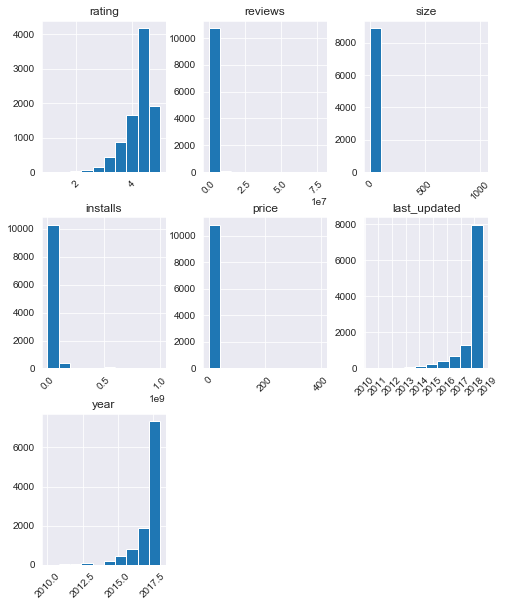

In [40]:
data.hist(figsize=(8,10), xrot=45)
plt.show()

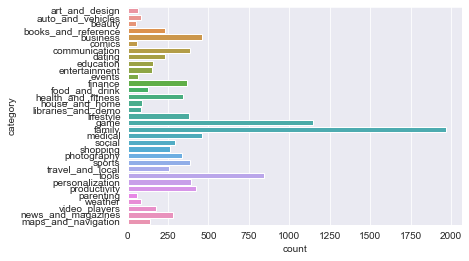

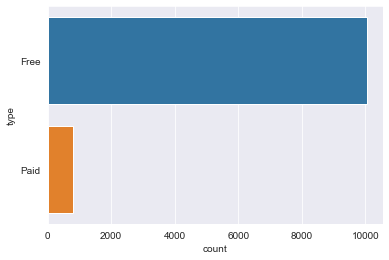

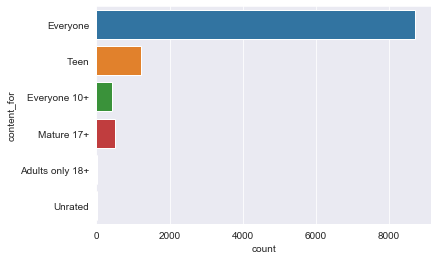

In [41]:
for column in data.select_dtypes(include='object'):
    if data[column].nunique() < 34:
        sns.countplot(y=column, data=data)
        plt.show()

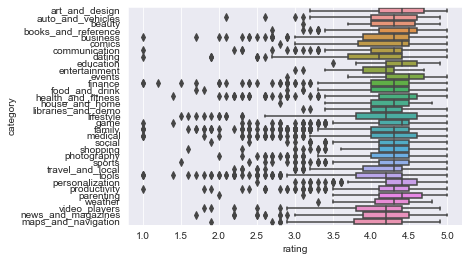

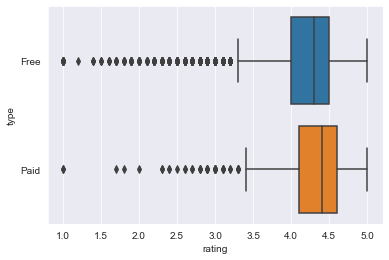

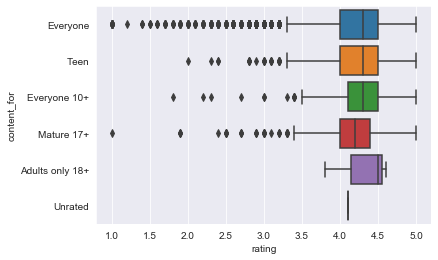

In [42]:
for column in data.select_dtypes(include='object'):
    if data[column].nunique() < 34:
        sns.boxplot(y=column, x='rating', data=data)
        plt.show()

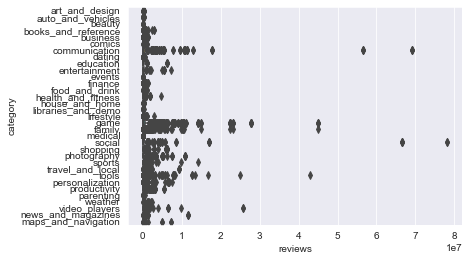

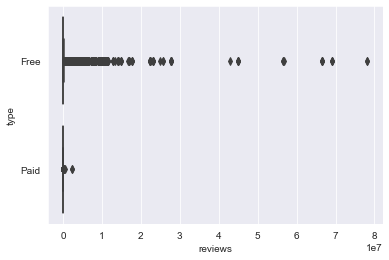

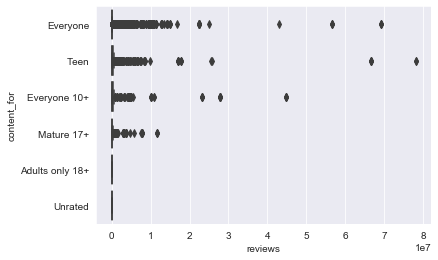

In [43]:
for column in data.select_dtypes(include='object'):
    if data[column].nunique() < 34:
        sns.boxplot(y=column, x='reviews', data=data)
        plt.show()

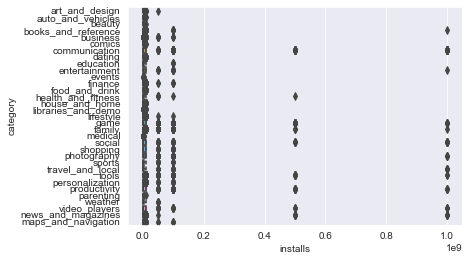

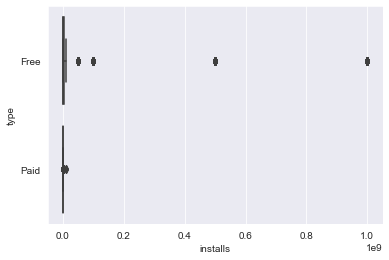

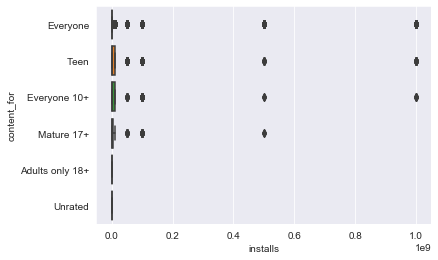

In [44]:
for column in data.select_dtypes(include='object'):
    if data[column].nunique() < 34:
        sns.boxplot(y=column, x='installs', data=data)
        plt.show()

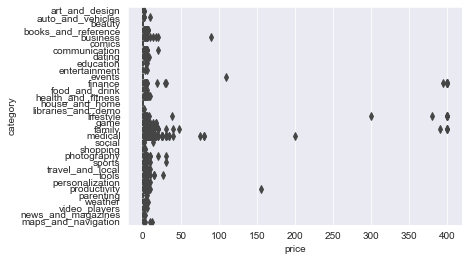

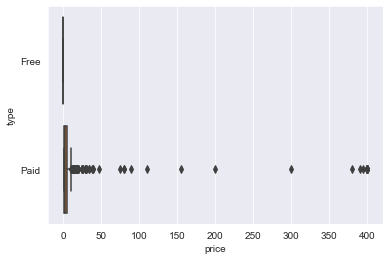

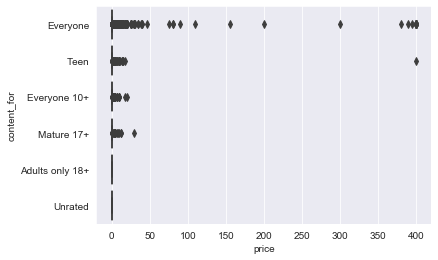

In [45]:
for column in data.select_dtypes(include='object'):
    if data[column].nunique() < 34:
        sns.boxplot(y=column, x='price', data=data)
        plt.show()

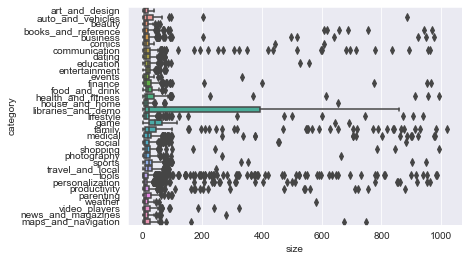

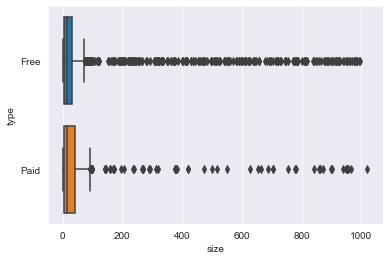

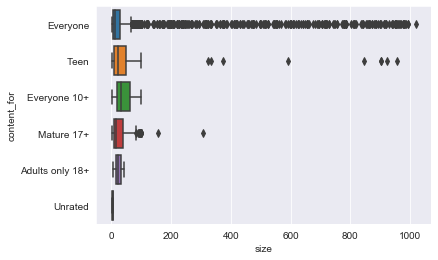

In [46]:
for column in data.select_dtypes(include='object'):
    if data[column].nunique() < 34:
        sns.boxplot(y=column, x='size', data=data)
        plt.show()

In [47]:
corr = data.corr()
corr

,rating,reviews,size,installs,price,year
rating,1.000000,0.068141,-0.018843,0.051355,-0.021903,0.137714
reviews,0.068141,1.000000,0.032105,0.643122,-0.009667,0.075537
size,-0.018843,0.032105,1.000000,0.014753,0.014495,-0.222937
installs,0.051355,0.643122,0.014753,1.000000,-0.011689,0.089368
price,-0.021903,-0.009667,0.014495,-0.011689,1.000000,-0.007897
year,0.137714,0.075537,-0.222937,0.089368,-0.007897,1.000000


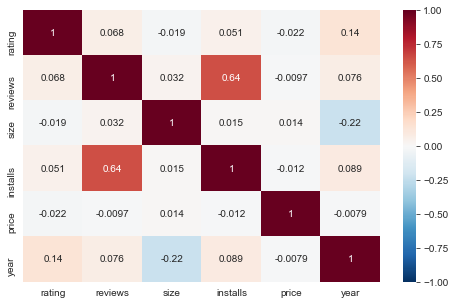

In [48]:
plt.figure(figsize=(8,5))
sns.heatmap(corr, cmap='RdBu_r', annot=True, vmin=-1, vmax=1)
plt.show()